In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data from csv file
ab= pd.read_csv('abalone.csv')
ab.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings
70,M,0.555,0.425,0.130,0.7665,0.2640,0.1680,0.275,13
877,F,0.635,0.500,0.150,1.3760,0.6495,0.3610,0.310,10
3864,I,0.320,0.235,0.065,0.1385,0.0580,0.0225,0.050,5
3227,F,0.450,0.350,0.135,0.5600,0.2310,0.1370,0.145,13
1541,I,0.360,0.275,0.075,0.2205,0.0985,0.0440,0.066,7


Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years

In [3]:
# checking shape
ab.shape

(4177, 9)

In [4]:
# checking data type
ab.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weigh     float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
# checking null value
ab.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weigh     0
Shell weight      0
Rings             0
dtype: int64

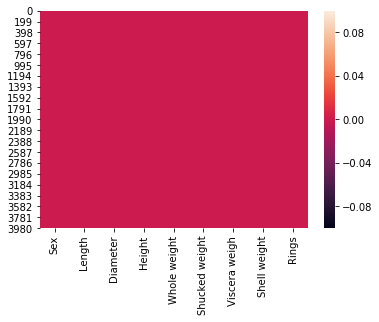

In [6]:
# heatmap of null value
sns.heatmap(ab.isnull())

In [7]:
# adding Age column
ab['Age'] = (ab['Rings']+1.5)
ab

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [8]:
# checking the data description
ab.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [9]:
# corelation between coloums
ab.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weigh,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


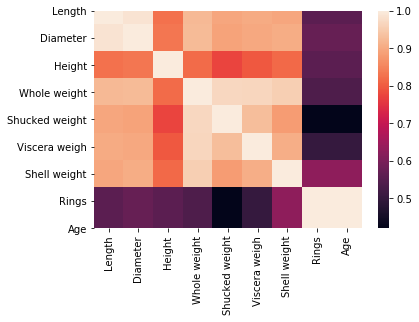

In [10]:
# heat map of corelation
sns.heatmap(ab.corr())

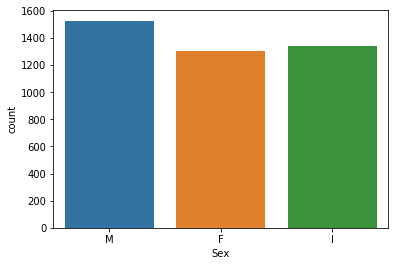

In [11]:
#checking count of diffrent sex
sns.countplot(x=ab['Sex'],data=ab)

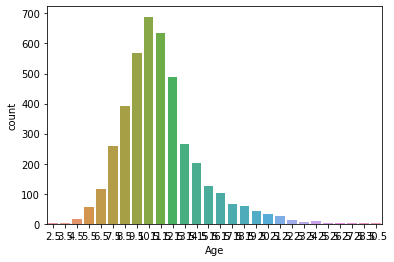

In [12]:
#checking count of diffrent sex
sns.countplot(x=ab['Age'],data=ab)

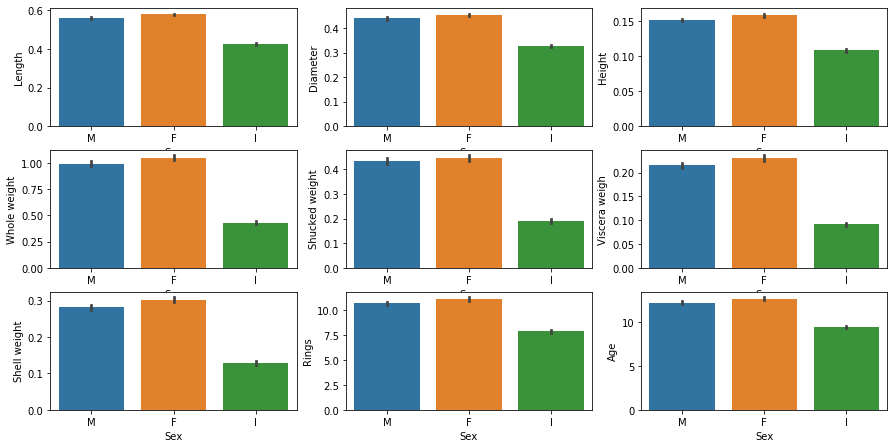

In [13]:
# creating bar plot of every colum with respect to sex to check how other parametr are distributed among gender
figure(num=None, figsize=(15,10))
for column_index, column in enumerate(ab.columns):
    if column == 'Sex':
        continue
    plt.subplot(4, 3, column_index)
    sns.barplot(x='Sex', y=column, data=ab)

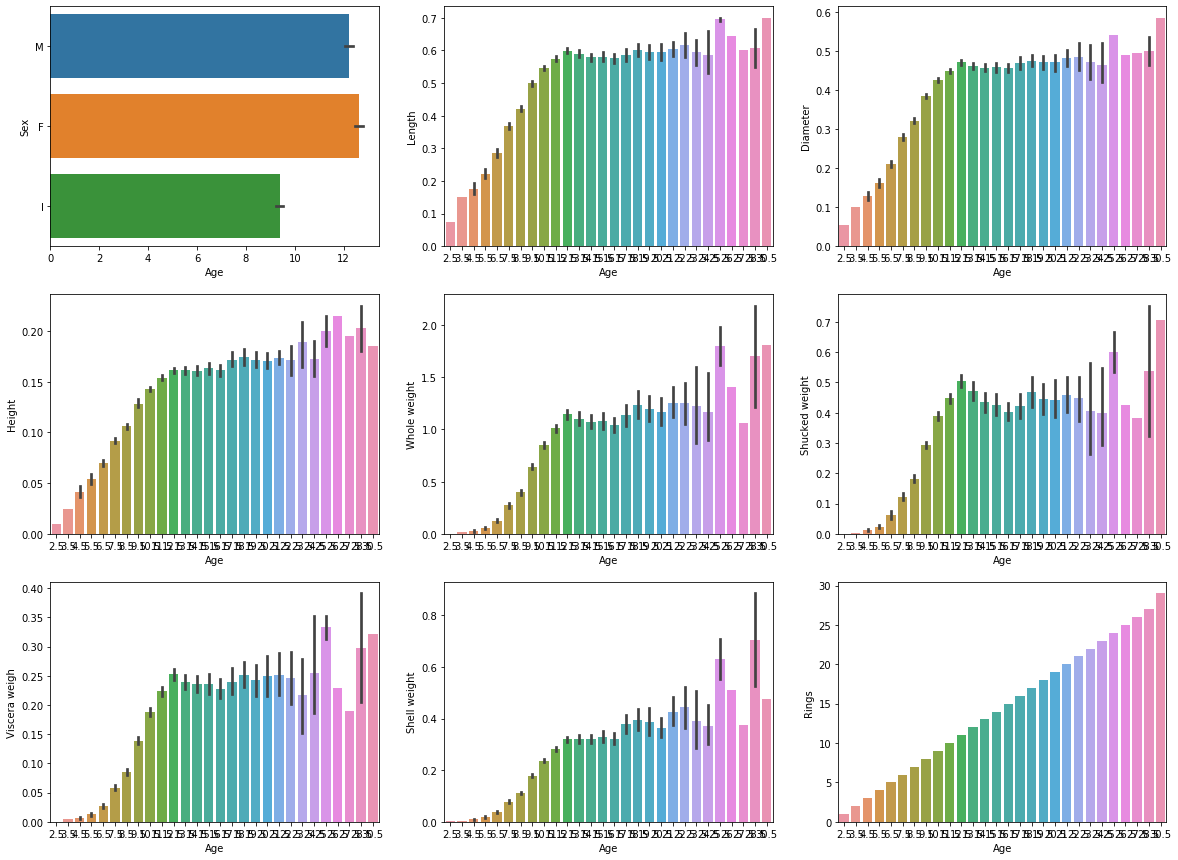

In [14]:
# creating bar plot of every colum with respect to Age to check how other parametr are distributed among Age
figure(num=None, figsize=(20,15))
for column_index, column in enumerate(ab.columns):
    if column == 'Age':
        continue
    plt.subplot(3, 3, column_index+1)
    sns.barplot(x='Age', y=column, data=ab)

In [15]:
continous_column_names=ab.drop(['Sex'], axis=1)

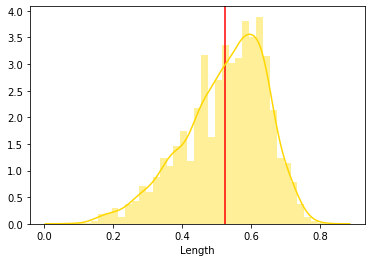

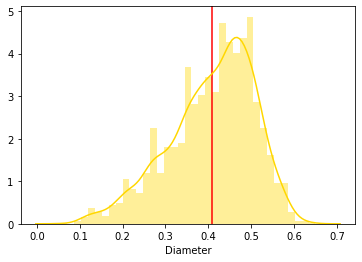

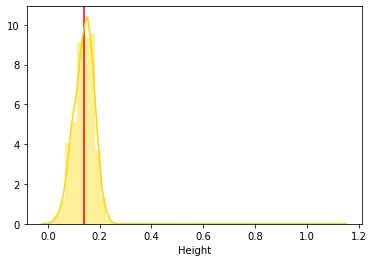

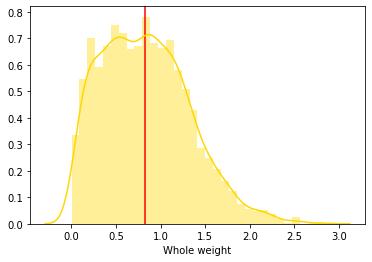

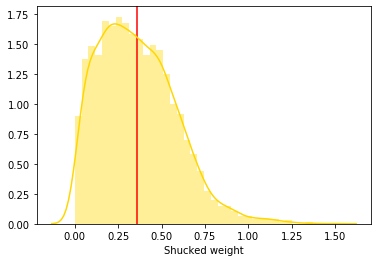

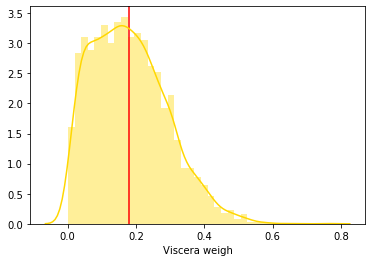

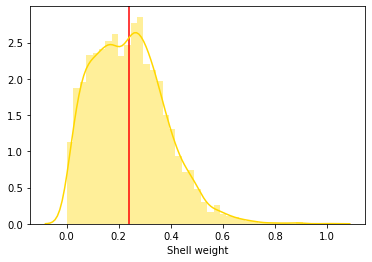

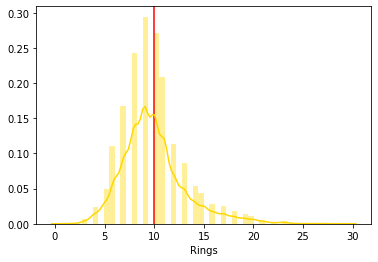

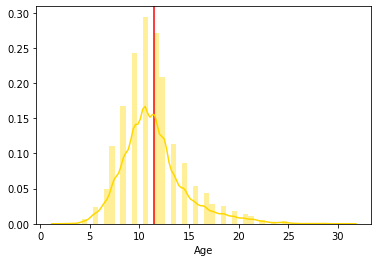

In [16]:
# Histogram - Distribution plot for all continous variables to visualize skewness
for i,col in enumerate(continous_column_names):
    
    #f, axes = plt.subplots(3, 3)
    plt.figure(i)
    plt.axvline(ab[col].mean(),color = 'r')
    sns.distplot(ab[col],color='gold')

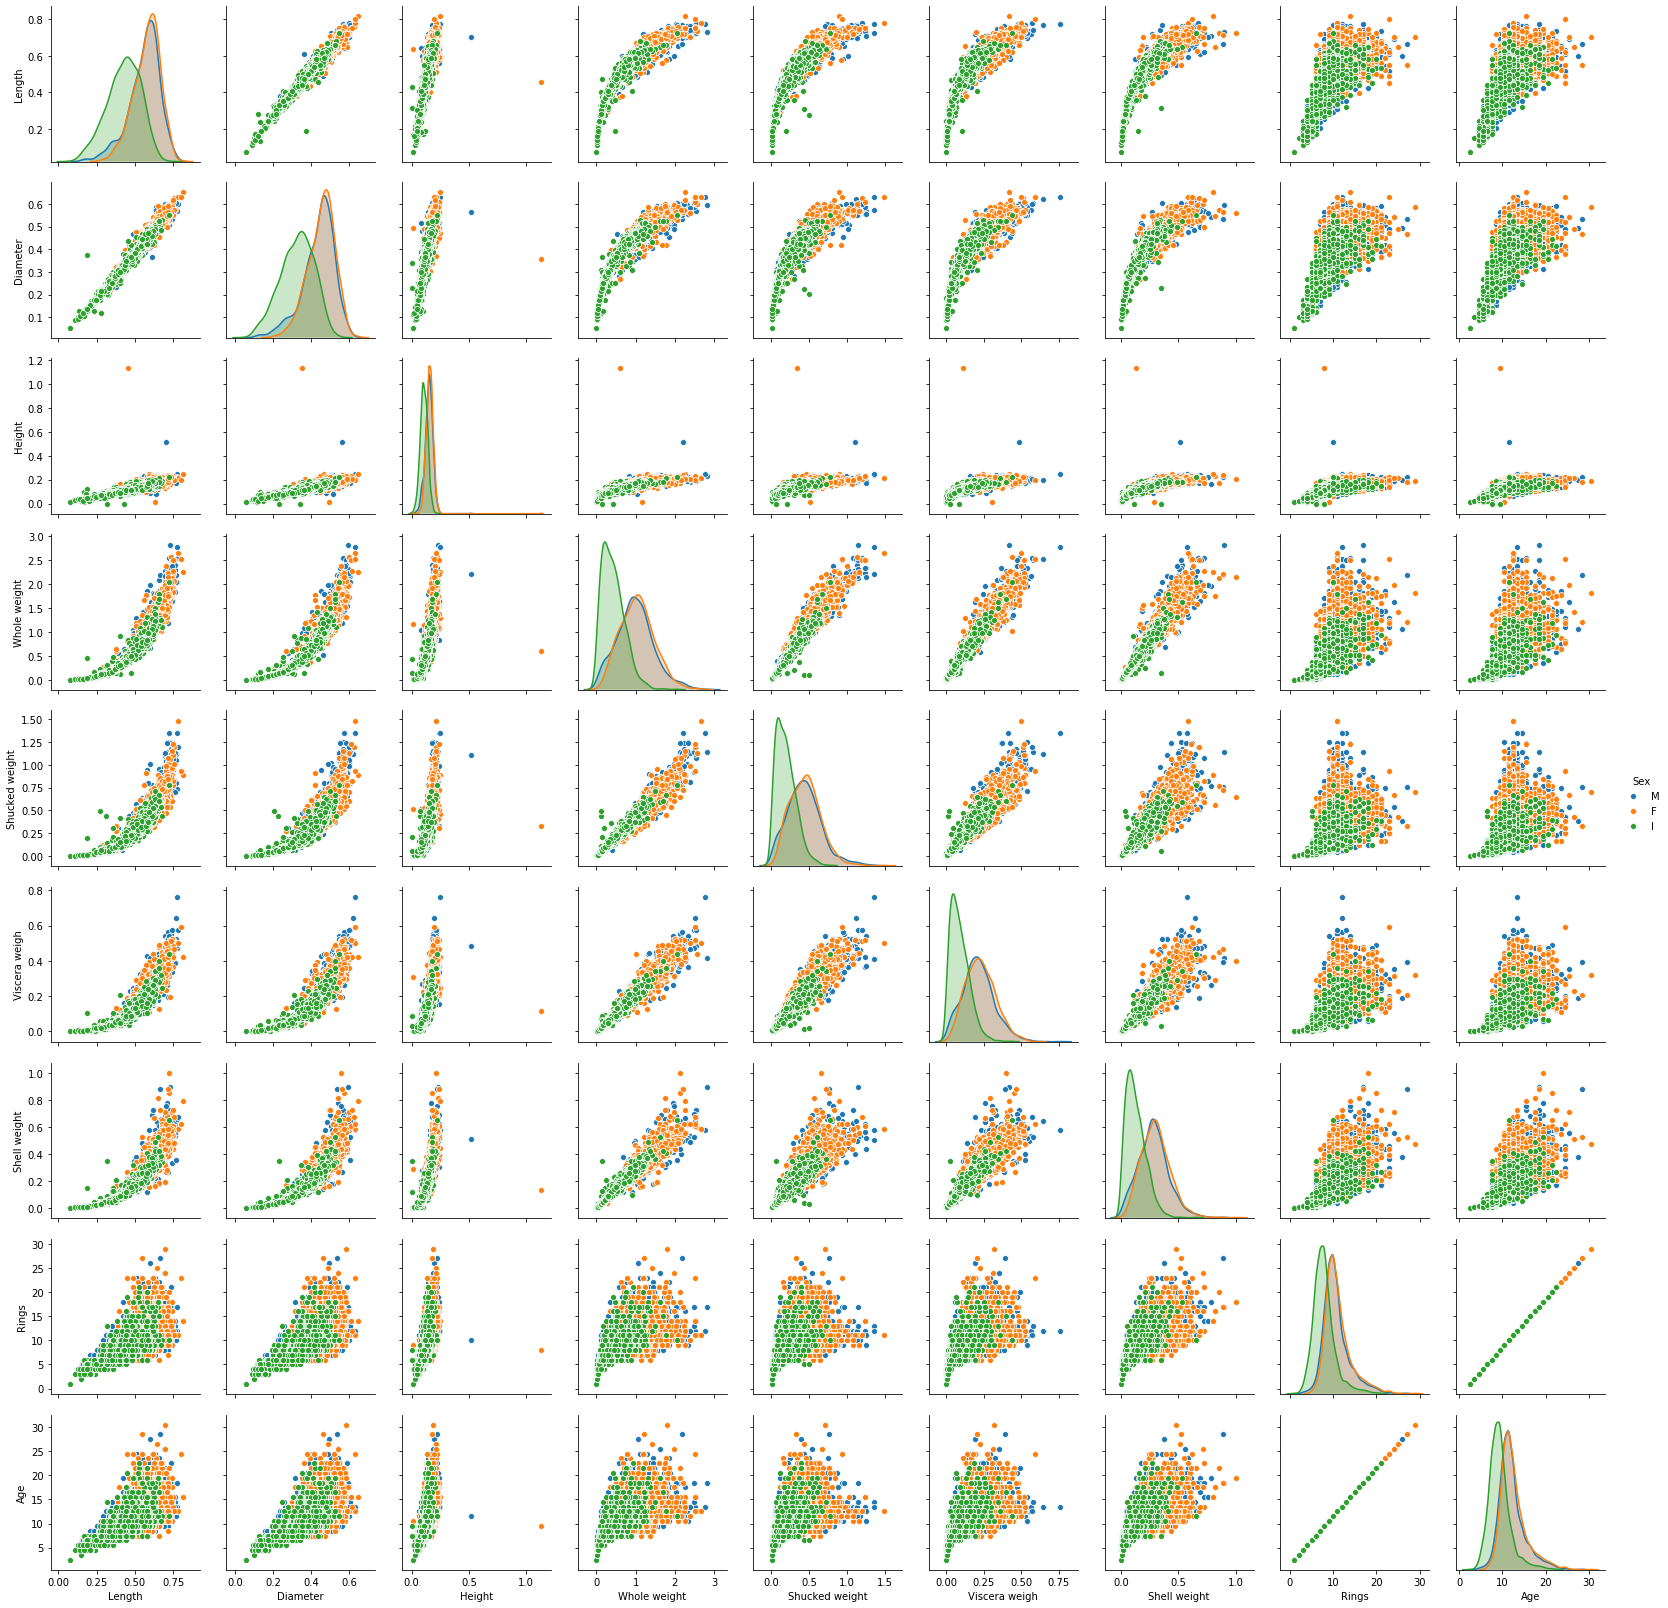

In [17]:
# pair plot to see the scatter of data using sex as hue for clear understanding
sns.pairplot(ab, hue='Sex')

Length               AxesSubplot(0.125,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Height            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Whole weight         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Viscera weigh     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Shell weight            AxesSubplot(0.125,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.398529,0.125;0.227941x0.222059)
Age                  AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

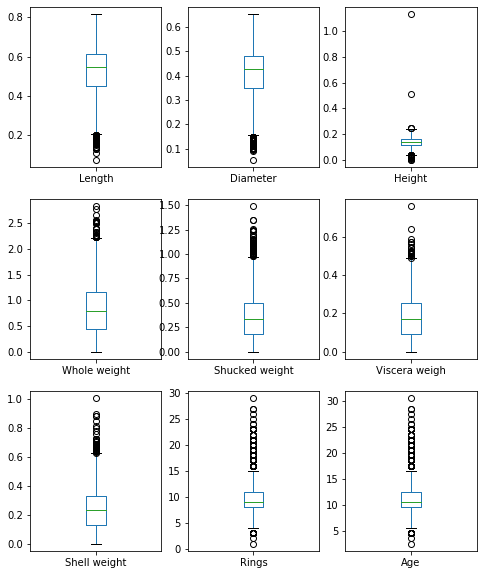

In [18]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
ab.plot(kind='box',subplots=True,layout=(3,3),figsize=(8,10))

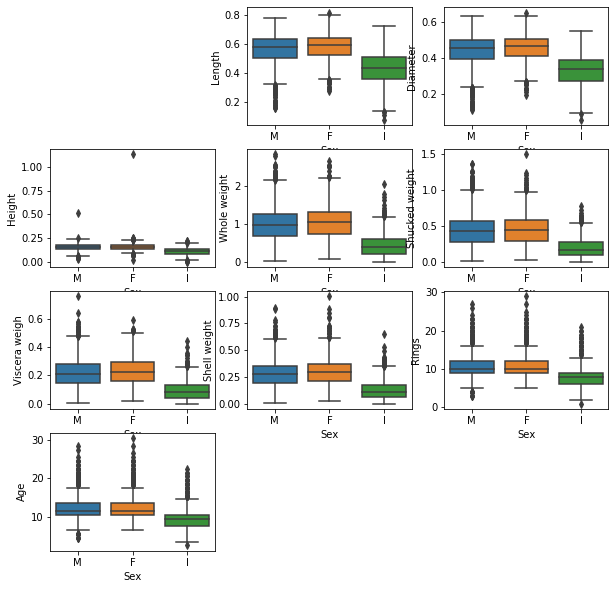

In [19]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires gender wise
figure(num=None, figsize=(10,10))
for column_index, column in enumerate(ab.columns):
    if column == 'Sex':
        continue
    plt.subplot(4, 3, column_index+1)
    sns.boxplot(x='Sex', y=column, data=ab)

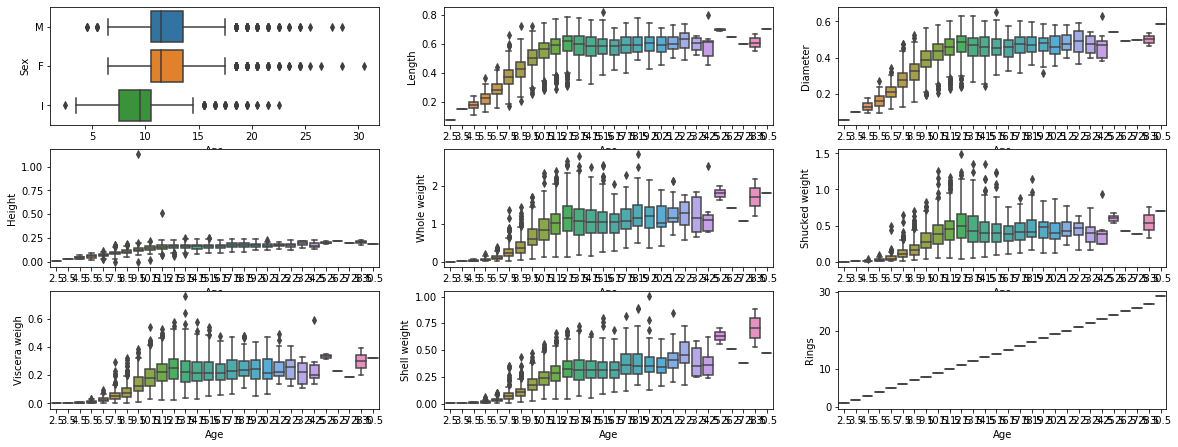

In [20]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires age wise
figure(num=None, figsize=(20,10))
for column_index, column in enumerate(ab.columns):
    if column == 'Age':
        continue
    plt.subplot(4, 3, column_index+1)
    sns.boxplot(x='Age', y=column, data=ab)

In [21]:
#changeing the object value of Sex colum to integer value using dummies
ab=pd.get_dummies(ab, columns=['Sex'])
ab.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


In [22]:
#rearranging the colums
ab = ab[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weigh','Shell weight','Rings',
         'Sex_F','Sex_I','Sex_M','Age']]
ab.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weigh,Shell weight,Rings,Sex_F,Sex_I,Sex_M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0,8.5


#### Frist we are droing rings and checking models for accuracy and cross val score


In [23]:
ab1=ab.drop(['Rings'],axis=1)

In [24]:
#checking skewness
ab1.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weigh     0.591852
Shell weight      0.620927
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
Age               1.114102
dtype: float64

In [25]:
#removing skewness
for col in ab1.columns:
    if ab1.skew().loc[col]>0.55:
        ab1[col]=np.cbrt(ab1[col])
    
for col in ab1.columns:
    if ab1.skew().loc[col]<-0.55:
        ab1[col]=np.power(ab1[col],2)
ab1.skew()

Length           -0.068660
Diameter         -0.026554
Height            0.398195
Whole weight      0.530959
Shucked weight   -0.478508
Viscera weigh    -0.497509
Shell weight      0.070616
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
Age               0.377228
dtype: float64

In [26]:
#removing outlires
z=abs(zscore(ab1))
print(ab1.shape)
ab1=ab1.loc[(z<3).all(axis=1)]
print(ab1.shape)

(4177, 11)
(4104, 11)


In [27]:
# dividing dataset into input values 'x1' and output value 'y1'
x1=ab1.iloc[:,0:-1]
print('x1 dataset\n',x1.head(),'\n')
y1=ab1.iloc[:,-1]
print('y1 datase\n',y1.head())

x1 dataset
      Length  Diameter    Height  Whole weight  Shucked weight  Viscera weigh  \
0  0.207025  0.133225  0.208201        0.5140        0.607769       0.465701   
1  0.122500  0.070225  0.200830        0.2255        0.463384       0.364682   
2  0.280900  0.176400  0.263162        0.6770        0.635374       0.521097   
3  0.193600  0.133225  0.250000        0.5160        0.599537       0.484881   
4  0.108900  0.065025  0.185664        0.2050        0.447309       0.340564   

   Shell weight  Sex_F  Sex_I  Sex_M  
0      0.282311    0.0    0.0    1.0  
1      0.169850    0.0    0.0    1.0  
2      0.353302    1.0    0.0    0.0  
3      0.288550    0.0    0.0    1.0  
4      0.144624    0.0    1.0    0.0   

y1 datase
 0    2.545822
1    2.040828
2    2.189760
3    2.257179
4    2.040828
Name: Age, dtype: float64


In [28]:
# standardizes the data in x1 using standerd scaler technique
scale=StandardScaler()
x1=scale.fit_transform(x1)

In [29]:
#creating models array with all the model, along with few blank array for further use
Model_array=[]
Random_state=[]
Max_r2score_array=[]
Cross_val_score_array=[]
Standard_Deviation=[]
Models=[('Ridge',Ridge()),('Lasso',Lasso()),('ElasticNet',ElasticNet()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('SGDRegressor',SGDRegressor()),('LinearRegression',LinearRegression()),('KNeighborsRegressor',KNeighborsRegressor())]

In [30]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x1,train_y1)
        pred=model.predict(test_x1)
        
        r2score=r2_score(test_y1,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [31]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x1,y1,cv=kf)
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [32]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
3,RandomForestRegressor,0.606406,78
0,Ridge,0.603508,55
5,LinearRegression,0.603490,55
4,SGDRegressor,0.585888,90
6,KNeighborsRegressor,0.585332,55
1,Lasso,0.000000,55
2,ElasticNet,0.000000,55


In [33]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
0,Ridge,0.446876,0.109922
5,LinearRegression,0.446762,0.110213
3,RandomForestRegressor,0.441474,0.104172
6,KNeighborsRegressor,0.440288,0.078739
4,SGDRegressor,0.434684,0.093992
1,Lasso,-0.196810,0.201406
2,ElasticNet,-0.196810,0.201406


#### Now we use rings as variables and checking models for accuracy and cross val score


In [34]:
#checking skewness
ab.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weigh     0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
Age               1.114102
dtype: float64

In [35]:
#removing skewness
for col in ab.columns:
    if ab.skew().loc[col]>0.55:
        ab[col]=np.cbrt(ab[col])
    
for col in ab.columns:
    if ab.skew().loc[col]<-0.55:
        ab[col]=np.power(ab[col],2)
ab.skew()

Length           -0.068660
Diameter         -0.026554
Height            0.398195
Whole weight      0.530959
Shucked weight   -0.478508
Viscera weigh    -0.497509
Shell weight      0.070616
Rings             0.249669
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
Age               0.377228
dtype: float64

In [36]:
#removing outlires
z=abs(zscore(ab))
print(ab.shape)
ab1=ab.loc[(z<3).all(axis=1)]
print(ab1.shape)

(4177, 12)
(4096, 12)


In [37]:
# dividing dataset into input values 'x' and output value 'y'
x=ab.iloc[:,0:-1]
print('x dataset\n',x.head(),'\n')
y=ab.iloc[:,-1]
print('y datase\n',y.head())

x dataset
      Length  Diameter    Height  Whole weight  Shucked weight  Viscera weigh  \
0  0.207025  0.133225  0.208201        0.5140        0.607769       0.465701   
1  0.122500  0.070225  0.200830        0.2255        0.463384       0.364682   
2  0.280900  0.176400  0.263162        0.6770        0.635374       0.521097   
3  0.193600  0.133225  0.250000        0.5160        0.599537       0.484881   
4  0.108900  0.065025  0.185664        0.2050        0.447309       0.340564   

   Shell weight     Rings  Sex_F  Sex_I  Sex_M  
0      0.282311  2.466212    0.0    0.0    1.0  
1      0.169850  1.912931    0.0    0.0    1.0  
2      0.353302  2.080084    1.0    0.0    0.0  
3      0.288550  2.154435    0.0    0.0    1.0  
4      0.144624  1.912931    0.0    1.0    0.0   

y datase
 0    2.545822
1    2.040828
2    2.189760
3    2.257179
4    2.040828
Name: Age, dtype: float64


In [38]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

In [39]:
#creating models array with all the model, along with few blank array for further use
Model_array=[]
Random_state=[]
Max_r2score_array=[]
Cross_val_score_array=[]
Standard_Deviation=[]
Models=[('Ridge',Ridge()),('Lasso',Lasso()),('ElasticNet',ElasticNet()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('SGDRegressor',SGDRegressor()),('LinearRegression',LinearRegression()),('KNeighborsRegressor',KNeighborsRegressor())]

In [40]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [41]:
# loop to find out the cross_val_score of all the model in models array, along a range of random state
for name, model in Models:
    kf=KFold(n_splits=10,random_state=best_random_state)
    cscore=cross_val_score(model,x,y,cv=kf)
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [42]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
3,RandomForestRegressor,1.000000,46
0,Ridge,0.999694,47
5,LinearRegression,0.999694,47
4,SGDRegressor,0.999556,36
6,KNeighborsRegressor,0.983964,81
1,Lasso,0.000000,47
2,ElasticNet,0.000000,47


In [43]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
3,RandomForestRegressor,0.999681,0.000558
0,Ridge,0.999497,0.000208
5,LinearRegression,0.999495,0.000209
4,SGDRegressor,0.999194,0.000265
6,KNeighborsRegressor,0.974406,0.007824
1,Lasso,-0.199672,0.192367
2,ElasticNet,-0.199672,0.192367


### Since using rings variables gives beeter R2 score for RandomForestRegressor is 1 and mean of cross val accuracy is RandomForestRegressor 0.999681.

It is quite evident that the diffrence is least between r2 score and cross val score for this model, which prove that model is perfect fit.

In [44]:
rfr=RandomForestRegressor()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=46,shuffle=True)
rfr.fit(train_x,train_y)
pred=rfr.predict(test_x)
score=cross_val_score(rfr,train_x,train_y,cv=14).mean()

print('Model score',rfr.score(train_x,train_y),'\n')
print('R2 score of model is :' ,r2_score(test_y,pred),'\n')
print('The mean of cross_val_score for the model is:',score,'\n')
#print('Model cofficient\n',rfr.coef_,'\n')
#print('Model intercept',rfr.intercept_,'\n')
print('Mean absolute error for model is : ',mean_absolute_error(test_y,pred),'\n')
print('Mean squared error for model is : ',mean_squared_error(test_y,pred),'\n')
print('Root mean squared error for model is : ',np.sqrt(mean_squared_error(test_y,pred)),'\n')

Model score 0.9997883373015682 

R2 score of model is : 0.9999507631917707 

The mean of cross_val_score for the model is: 0.9994001802125763 

Mean absolute error for model is :  9.595262514009562e-05 

Mean squared error for model is :  2.0357484338617566e-06 

Root mean squared error for model is :  0.0014267965635863288 



In [45]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 3 Abalone Case Study prediction.csv')

In [46]:
# saving the model using pickle.
joblib.dump(rfr,'rfr_Project 3 Abalone Case Study.pkl')

['rfr_Project 3 Abalone Case Study.pkl']